In [31]:
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("candy_production.csv")

In [3]:
df.head(3)

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229


In [4]:
df.columns=["Month","Sales"]

In [5]:
df.head(2)

,Month,Sales
0,1972-01-01,85.6945
1,1972-02-01,71.8200


In [6]:
df=df.drop(['Month'],axis=1)

<Axes: >

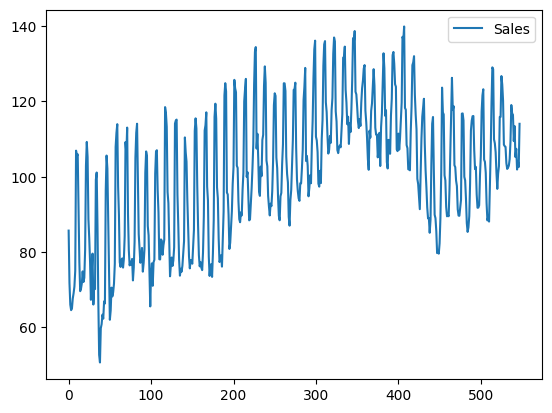

In [7]:
df.plot()

In [8]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
# adfuller_test(df['Sales First Difference'].dropna())
df['Sales12'] = df['Sales'] - df['Sales'].shift(12)

In [11]:
adfuller_test(df['Sales12'].dropna())
# df=df.drop(['Sales'],axis=1)
# df.head(2)

is stationary


In [12]:
df.head()


,Sales,Sales12
0,85.6945,NaN
1,71.8200,NaN
2,66.0229,NaN
3,64.5645,NaN
4,65.0100,NaN


In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

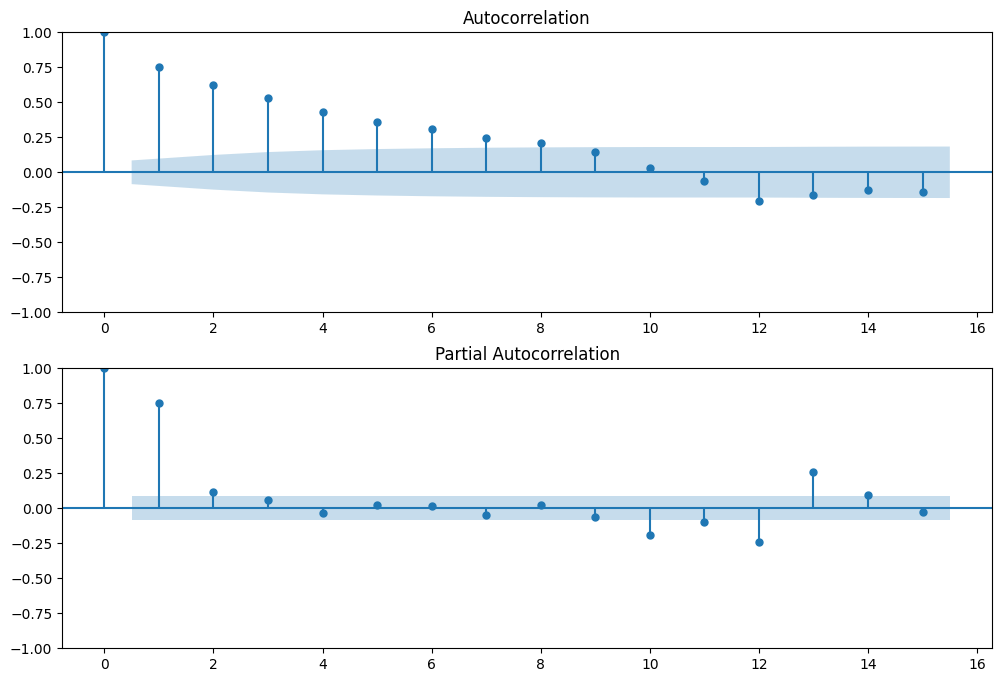

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales12'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales12'].dropna(),lags=15,ax=ax2)

In [15]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [16]:
import warnings

warnings.filterwarnings("ignore")

In [17]:
autoarima_model = auto_arima(df['Sales12'].dropna(), trace=True,  suppress_warnings=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3571.162, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3118.635, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3301.412, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3574.625, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3113.512, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3113.405, Time=0.89 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3114.781, Time=1.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3114.772, Time=1.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3114.172, Time=1.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3116.662, Time=1.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3112.121, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3112.299, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3113.533, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  536
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1552.060
Date:                Thu, 18 Jan 2024   AIC                           3112.121
Time:                        11:47:00   BIC                           3129.257
Sample:                             0   HQIC                          3118.825
                                - 536                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6633      0.037     17.739      0.000       0.590       0.737
ar.L2          0.0735      0.050      1.472      0.141      -0.024       0.171
ar.L3          0.0638      0.041      1.563      0.118      -0.016       0.144
sigma2        19.1392      0.940     20.356      0.000      17.296      20.982
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.07
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
size = int(len(df) * 0.90)
train= df[:size]
test= df[size:]

In [19]:
print(len(train))
print(len(test))
print(len(df))

493
55
548


In [20]:
model=SARIMAX(train['Sales'],order=(2,0,3),seasonal_order=(2,0,3,12))
# model=ARIMA(train['Sales'],order=(2,0,3))
results=model.fit()

In [21]:
forecast=results.forecast(steps=len(test))
#  we can use this also for prediction
# forecast=results.predict(start=len(train)+1 ,end=len(df), dynamic=True)

In [22]:
abs(forecast- test['Sales'])

493     2.415873
494     4.790687
495     1.863862
496     0.507634
497     0.402216
498     0.166137
499     0.414379
500     4.042232
501     2.337477
502     2.548155
503     4.883858
504     1.372268
505     0.056910
506     3.207559
507     0.537392
508     3.106584
509     2.191382
510     4.673794
511     1.785893
512     2.076034
513     0.143902
514    10.031906
515    10.820441
516     4.776345
517     5.728164
518     9.023710
519     7.981635
520     5.619332
521     9.893514
522    10.871805
523    17.081048
524     8.371394
525     7.606874
526     6.226805
527     2.913269
528     4.060871
529     5.592257
530    11.205173
531    11.232528
532    11.638851
533    11.943474
534    11.262060
535     5.970156
536     1.575442
537     0.378369
538     0.973204
539     0.102124
540     5.377578
541    11.343595
542     8.731327
543    15.310085
544    11.698965
545    14.177453
546    11.531828
547    16.174471
dtype: float64

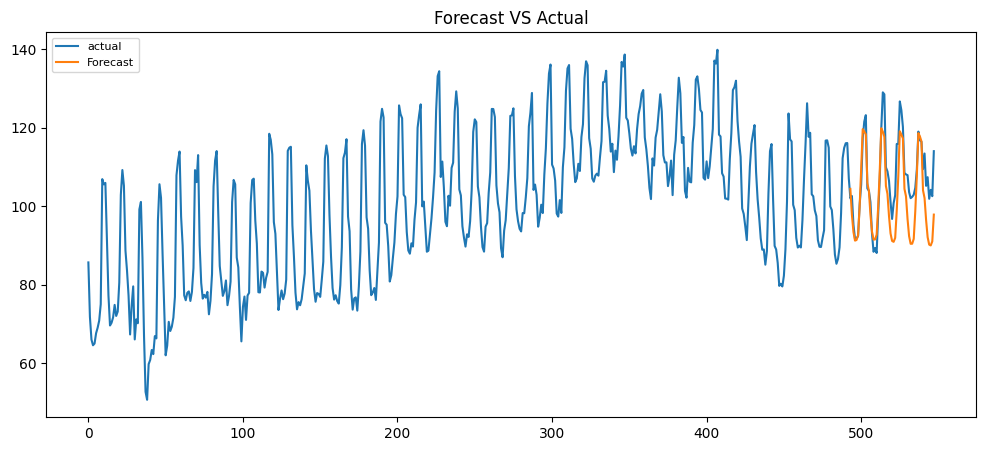

In [23]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Sales'],label='actual')
plt.plot(forecast, label='Forecast')
# # plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

<Axes: ylabel='Density'>

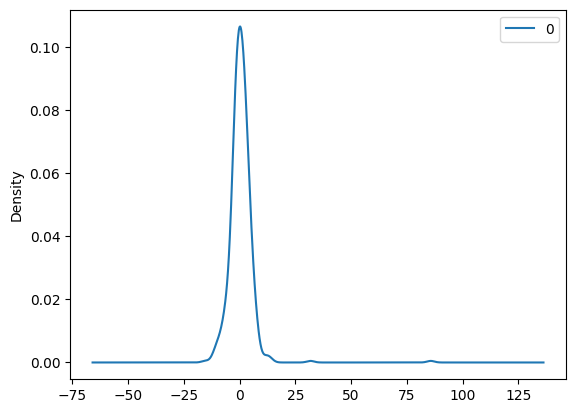

In [33]:
residual=DataFrame(results.resid)
residual.plot(kind='kde')

In [25]:
rmse= sqrt(mean_squared_error(forecast,test['Sales']))
rmse

7.650030213595671

In [26]:
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = results.forecast(steps=forecast_steps+20) 

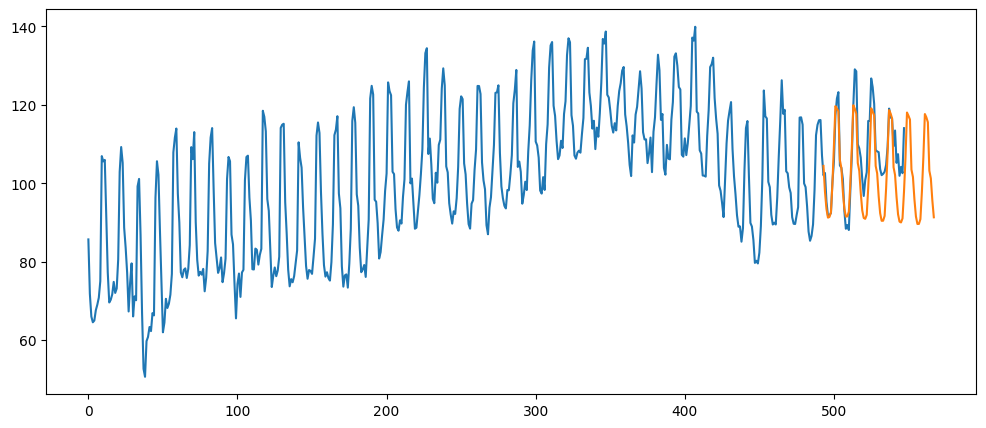

In [29]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Sales'], label='Training')
plt.plot(forecast, label='Forecast')